---
# **FoodHub Exploratory Data Analysis**
---
#####Case Study Developed within MIT
---

####**Context**
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

---
####**Objective**
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.
Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

---
#### **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

---
#### **Data Dictionary**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information
---

### **Let us start by importing the required libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### **Understanding the structure of the data**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **How many rows and columns are present in the data?**

In [ ]:
df.shape

(1898, 9)

#### **Observations:**
In the given Data we observe:
- Number of rows: 1898
- Number of columns : 9


### **What are the datatypes of the different columns in the dataset?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**

From the data we observe the following:

 * **Order_id** - The data are integers.
 * **Customer_id** - The data are integers.
 * **Restaurant_name** - The data are objects.
 * **Cuisine_type** - The data are objects.
 * **Cost_of_the_order** - The data are floating-point numbers.
 * **Day_of_the_week** - The data are objects.
 * **Rating** - The data are objects.
 * **Food_preparation_time** - The data are integers.
 * **Delivery_time** - The data are integers.

###**Are there any missing values in the data?**

In [ ]:
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### **Observations:**

There are no missing values in the data.


### **Checing the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?**

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### **Observations:**

As per the given data we observe that food preparation times are:
* **Minimum preparation time:** 20 minutes
* **Maximum preparation time:** 35 minutes
* **Average preparation time:** 27.37 minutes


###**How many orders are not rated?**

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### **Observations:**

From the data we observe that in the column 'rating' there are **736** orders that have not been rated.

---
## **Exploratory Data Analysis (EDA)**
---

## **Univariate Analysis**
Exploring all the variables used for univariate exploration and provide observations on their distributions.

####**Exploring the Categorical variables:**
* Rating
* Cuisine Type
* Restaurant Name
* Day of the week


In [ ]:
# Below is a function that generates Percentage Bar Graphs.

def percent_bar_graph(data, column_name):

    # Get the total number of items in the specified column
    total_items = len(data[column_name])

    # Set up the size of the plot
    plt.figure(figsize=(15, 7))

    # Rotate the x-axis labels to make them easier to read
    plt.xticks(rotation=45)

    # Convert the specified column to a 'category' data type for better plotting
    data[column_name] = data[column_name].astype('category')

    # Create the bar plot using Seaborn
    ax = sns.countplot(data=data, x=column_name, palette='pastel')

    # Add percentage labels to each bar
    for bar in ax.patches:
        # Calculate the percentage for each bar
        percentage = '{:.1f}%'.format(100 * bar.get_height() / total_items)

        # Determine the position to place the percentage label
        x_position = bar.get_x() + bar.get_width() / 2 - 0.05
        y_position = bar.get_y() + bar.get_height()

        # Add the percentage label to the bar
        ax.annotate(percentage, (x_position, y_position), size=12)


    plt.show()

###**Rating**

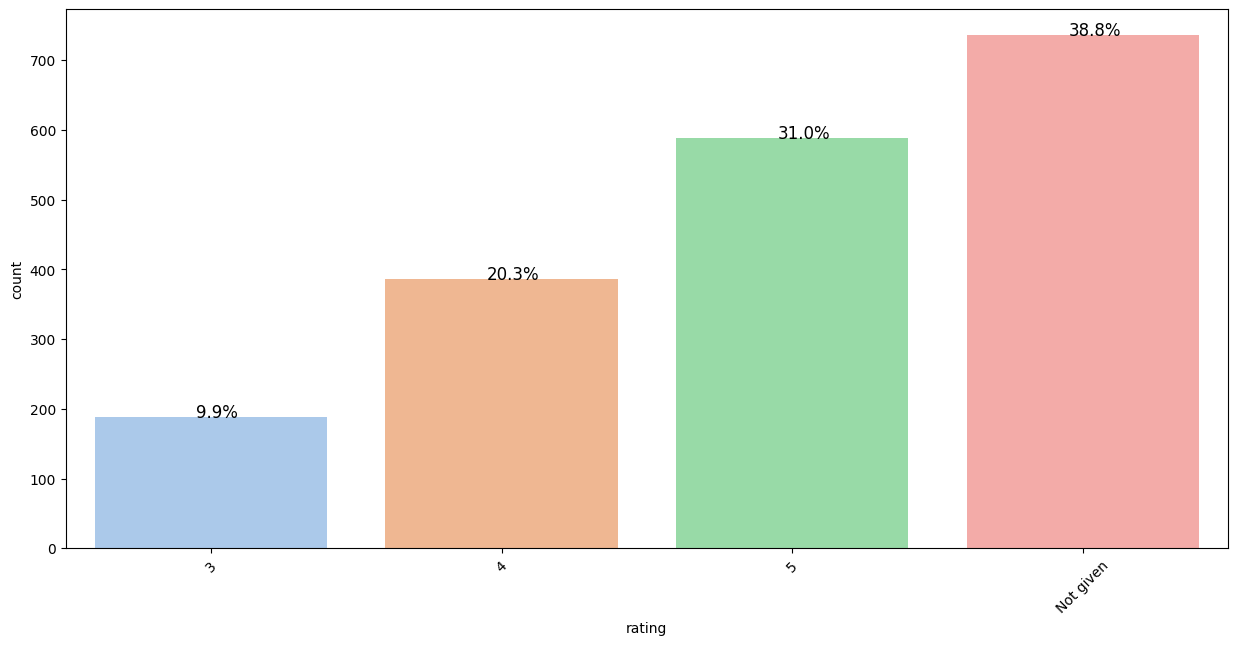

In [ ]:
percent_bar_graph(df,'rating')

####**Observation:**

* There is a significant number of "not given" ratings. Also, we observe that ratings of 1 and 2 are missing ratings of 4 and 5 are around 50%.

###**Cuisine Type**

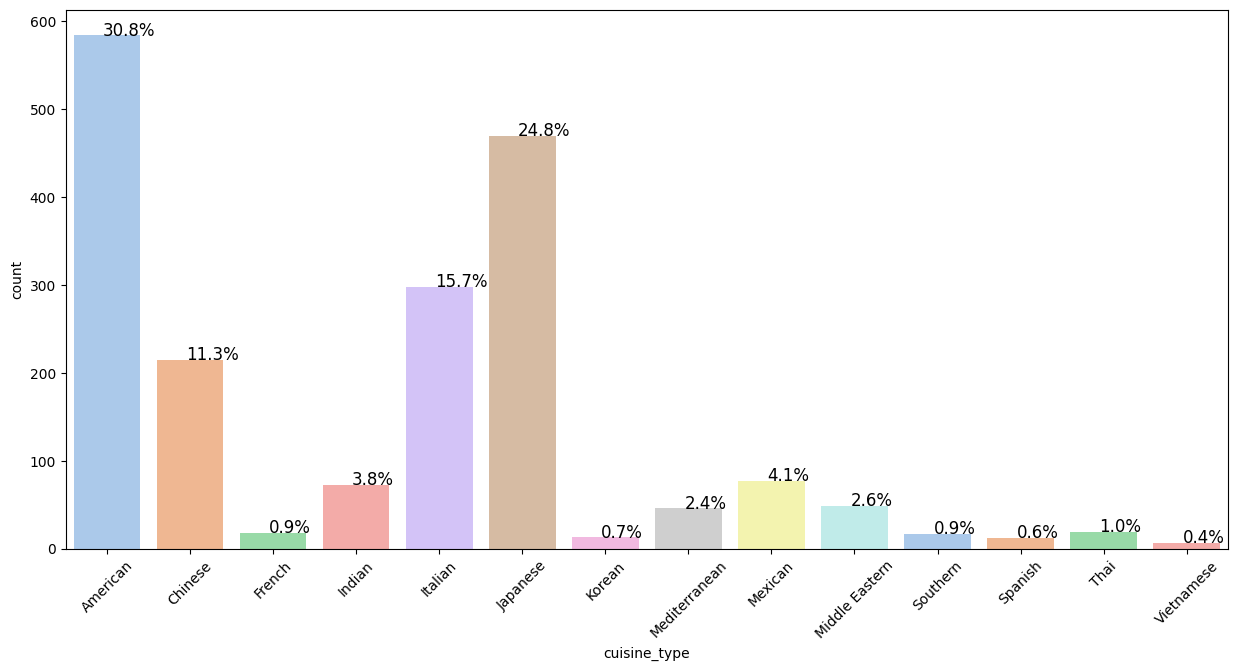

In [ ]:
cuisine_percent = percent_bar_graph(df,'cuisine_type')

####**Observation:**

* We observe that a large percentage, 71.3%, of orders are related to "American," "Japanese," and "Italian" cuisines, which must play a considerable role in the overall app's development.

###**Restaurant Name**

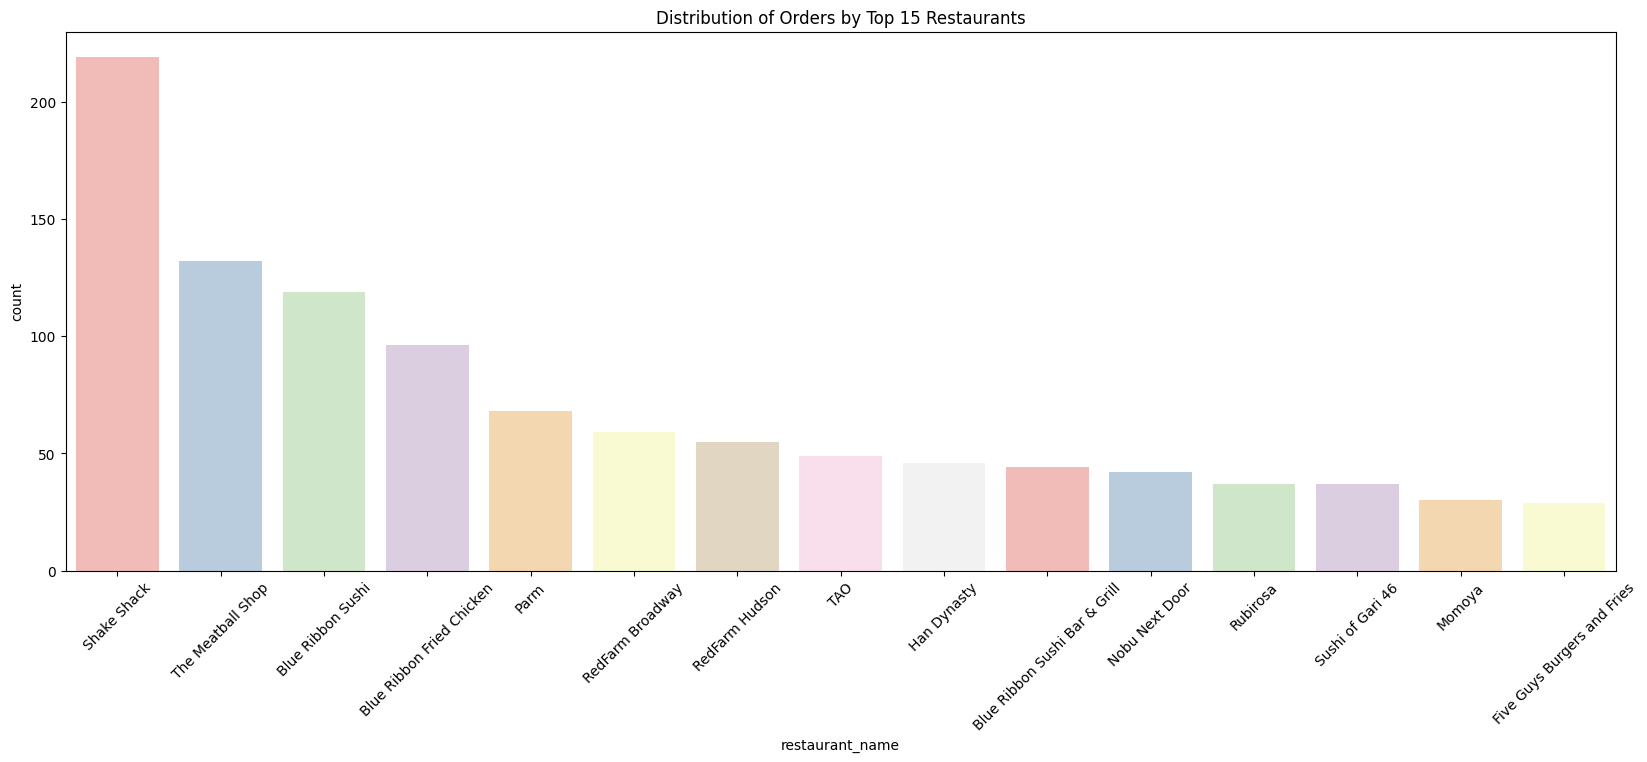

The total number of Restaurants is :  (1898,)


In [ ]:
plt.figure(figsize=(20, 7))

# Find the top 15 restaurants
top_15restaurants = df['restaurant_name'].value_counts().nlargest(15)
# Generate the countplot graph
sns.countplot(data=df, x='restaurant_name', order=top_15restaurants.index,palette = 'Pastel1')

plt.title('Distribution of Orders by Top 15 Restaurants')
plt.xticks(rotation=45)
plt.show()

print('The total number of Restaurants is : ', df['restaurant_name'].shape )


####**Observation:**

* We can see that there are mostly four popular restaurants:

* Two American cuisine restaurants: "Shake Shack," which is very popular, and "Blue Ribbon Fried Chicken.""Blue Ribbon Fried Chicken"
* One Italian cuisine restaurant: "The Meatball Shop."
* One Japanese cuisine restaurant: "Blue Ribbon Sushi."

Also, realizing that the very popular American types are fast foods, it may have an effect on preparation time, and cost, which may play an important role in their popularity.

###**Day of the Week**

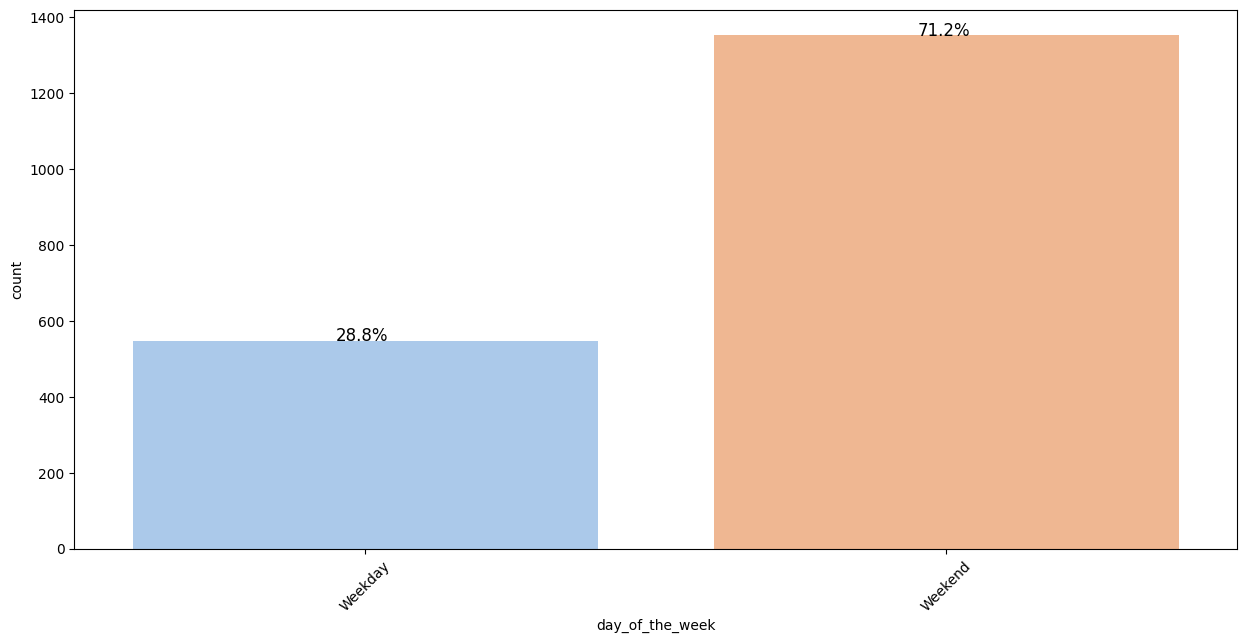

In [ ]:
percent_bar_graph(df,'day_of_the_week')

####**Observation:**

* We observe that orders are significantly higher during the weekends and much lower during the week days.

### **Exploring the numerical variables:**
- Cost of Order
- Food Preparation Time
- Delivery Time

In [ ]:
# Below is a function that generates Box-Plots and Histogram graphs.

def boxplots_histplots(feature, figsize=(15, 10), bins='auto'):

    # Create a figure with two subplots: one for the box plot and one for the histogram
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, figsize=figsize, sharex=True)

    # Create the box plot
    sns.boxplot(x=feature, ax=ax_box)

    # Create the histograms
    sns.histplot(x=feature, ax=ax_hist, kde=True, bins=bins)

    # Caqlculate the median
    median = np.median(feature)
    # show the median line in the graph
    ax_hist.axvline(np.median(feature), color='red', linestyle='-')

    # Caqlculate the mean
    mean = np.mean(feature)
    # show the median line in the graph
    ax_hist.axvline(np.mean(feature), color='Green', linestyle='-')



    plt.show()


###**Cost of the Order**

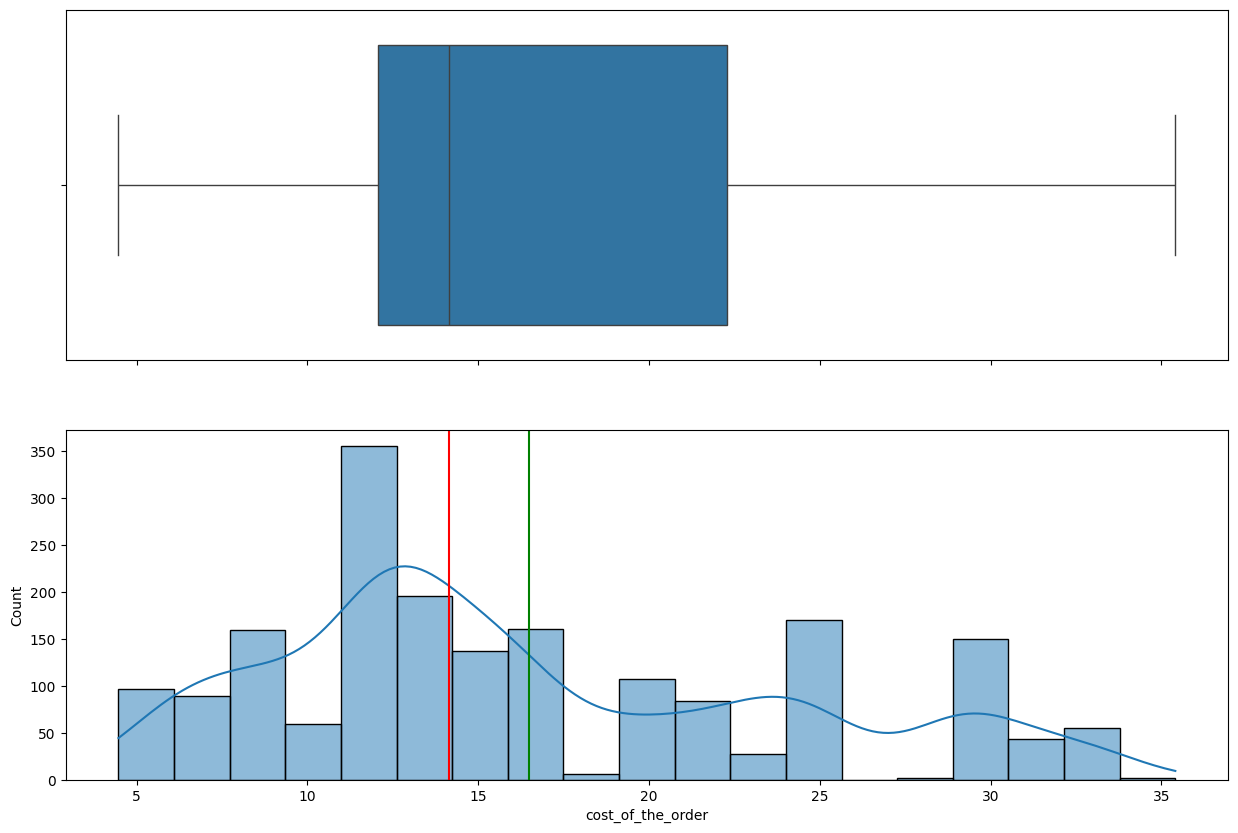

The calculation of mean for cost of the order is: 16.498851422550054
The calculation of median for cost of the order is: 14.14


In [ ]:
boxplots_histplots(df['cost_of_the_order'])

# Calculate and print the Mean and Median
cost_mean = df['cost_of_the_order'].mean()
cost_median = df['cost_of_the_order'].median()

print('The calculation of mean for cost of the order is:', cost_mean)
print('The calculation of median for cost of the order is:', cost_median)

####**Observations:**
* From the graph, we can observe that the distribution of the "Cost of the Order" is right-skewed.
* Most of the orders are made in the range between \$13 and \$14 dollars.
* The median and the mean have a gap of \$2.35 dolars with the mean being on the higher cost side of \$16.19 dollars.
* There are no outliers.

###**Food Preparation Time**

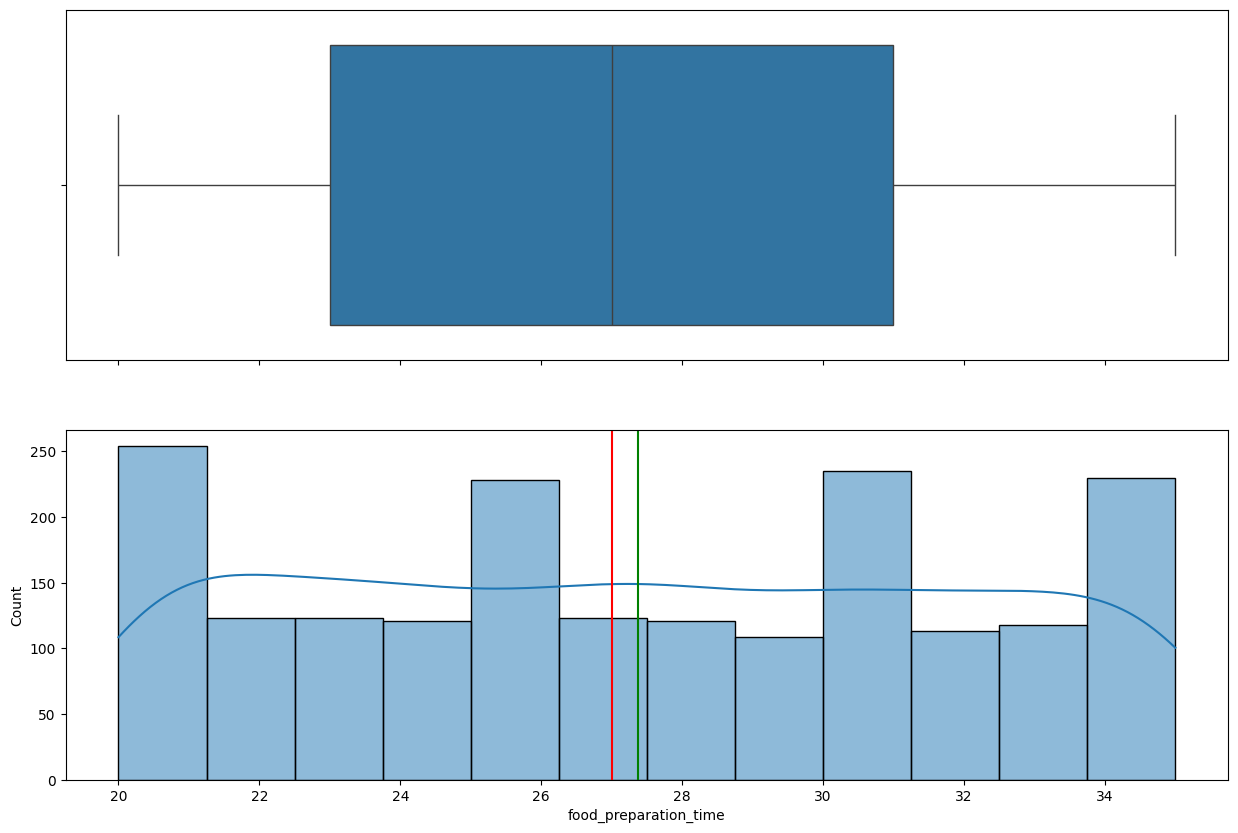

The calculation of mean for Food Preparation Time is: 27.371970495258168
The calculation of median for Food Preparation Time is: 27.0


In [ ]:
boxplots_histplots(df['food_preparation_time'])

# Calculate and print the Mean and Median
food_prep_mean = df['food_preparation_time'].mean()
food_prep_median = df['food_preparation_time'].median()

print('The calculation of mean for Food Preparation Time is:', food_prep_mean)
print('The calculation of median for Food Preparation Time is:', food_prep_median)

####**Observations:**
* The distribution of food preparation time is uniformly distributed
* The median and the mean have a small difference of 0,37min with the mean being slightly higher.
* There are no outliers

###**Delivery Time**

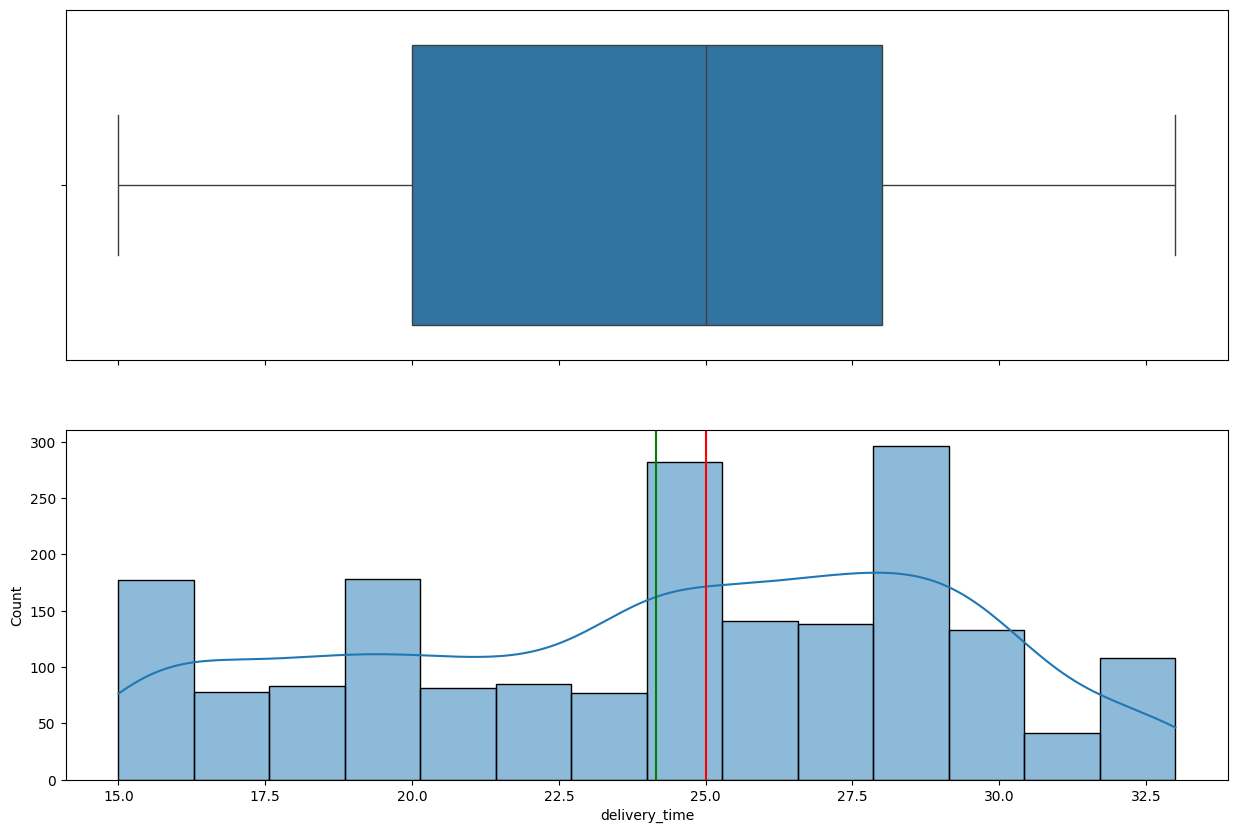

The calculation of mean for Delivery Time is: 24.161749209694417
The calculation of median for Delivery Time Time is: 25.0


In [ ]:
boxplots_histplots(df['delivery_time'])

# Calculate and print the Mean and Median
delivery_time_mean = df['delivery_time'].mean()
delivery_time_median = df['delivery_time'].median()

print('The calculation of mean for Delivery Time is:', delivery_time_mean)
print('The calculation of median for Delivery Time Time is:', delivery_time_median)

####**Observations:**
* From the graph, we can observe that the distribution of the "Delivery Time" is slightly left-skewed.
* Most of the orders are made in the range between 14 and 29 minutes.
* The median and the mean have a gap of 0.84 minutes with the mean being on the lower side with 24.16 minutes.
* There are no outliers.

### **Which are the top 5 restaurants in terms of the number of orders received?**

In [ ]:
restaurant_orders = df['restaurant_name'].value_counts()
restaurant_orders.head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### **Observations:**
The top 5 restaurants are:

* 1. Shake Shack                  219 orders
* 2. The Meatball Shop            132 orders
* 3. Blue Ribbon Sushi            119 orders
* 4. Blue Ribbon Fried Chicken     96 orders
* 5. Parm                          68 orders


### **Which is the most popular cuisine on weekends?**

In [ ]:
weekend_data = df[df['day_of_the_week'] == 'Weekend']
weekend_data['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### **Observations:**

Most popular cuisine on weekends is the **American** with **415** orders


### **What percentage of the orders cost more than 20 dollars?**

In [ ]:
more_than_20 = df['cost_of_the_order'][df['cost_of_the_order'] >20]
more_than_20_tot = more_than_20.count()

total = df['cost_of_the_order'].count()

# calculate the precentage
percentage = '{:.1f}%'.format(100 * more_than_20_tot / total)

print('The percentage of orders more than 20$ is:', percentage)

The percentage of orders more than 20$ is: 29.2%


#### **Observations:**

The percentage of orders that cost more than \$20 is 29.2%


### **What is the mean order delivery time?**

In [ ]:
deliv_time_mean= "{:.3f}".format(df['delivery_time'].mean())
print('The mean time of delivery orders is:',deliv_time_mean,'minutes')

The mean time of delivery orders is: 24.162 minutes


#### **Observations:**
The mean time of delivery orders is 24.162 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
top3_customers = df['customer_id'].value_counts().head(3)

for customer_id, num_orders in top3_customers.items():
    print(
        'Customer ID:' ,[customer_id],
        'Number of Orders:',[num_orders]
        )


Customer ID: [52832] Number of Orders: [13]
Customer ID: [47440] Number of Orders: [10]
Customer ID: [83287] Number of Orders: [9]


#### **Observations:**
* Customer ID: 52832 Number of Orders: 13
* Customer ID: 47440 Number of Orders: 10
* Customer ID: 83287 Number of Orders: 9

## **Multivariate Analysis**

Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It could be a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables).

##**Multivariate Relation between numerical variables**

### **Correlation Heatmap**

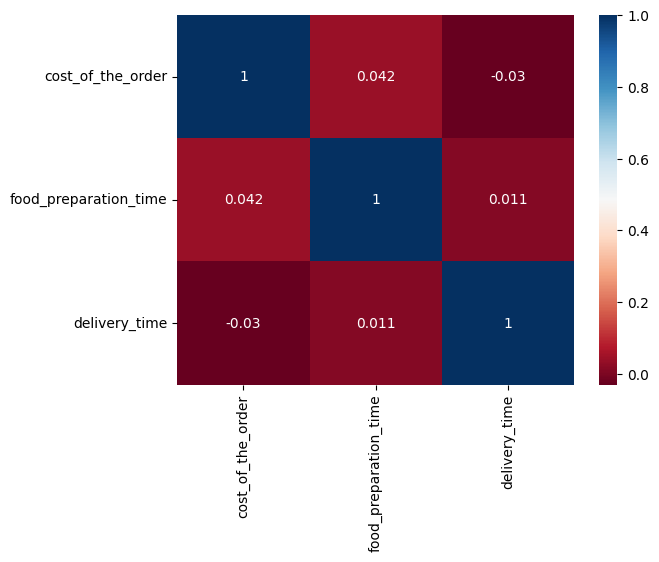

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Generate a correlation Heatmap
sns.heatmap(
    data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(),
    annot=True,
    cmap='RdBu',
    )

plt.figure(figsize=(15,10))
plt.show()


####**observations:**

- There is a very weak correlation between the numerical variables.
- The highest correlation is between Food Preparation time and Delivery Time 0.22 but still very weak.

##**Multivariate Relation between Numerical and Categorical variables**

###**Exploring Cost of the Order with the categorical variables:**
- Day of the Week
- Cuisine Type
- Rating
- Restaurant Name


### **Cost of the Order vs Day of the Week &  Cuisine Type**

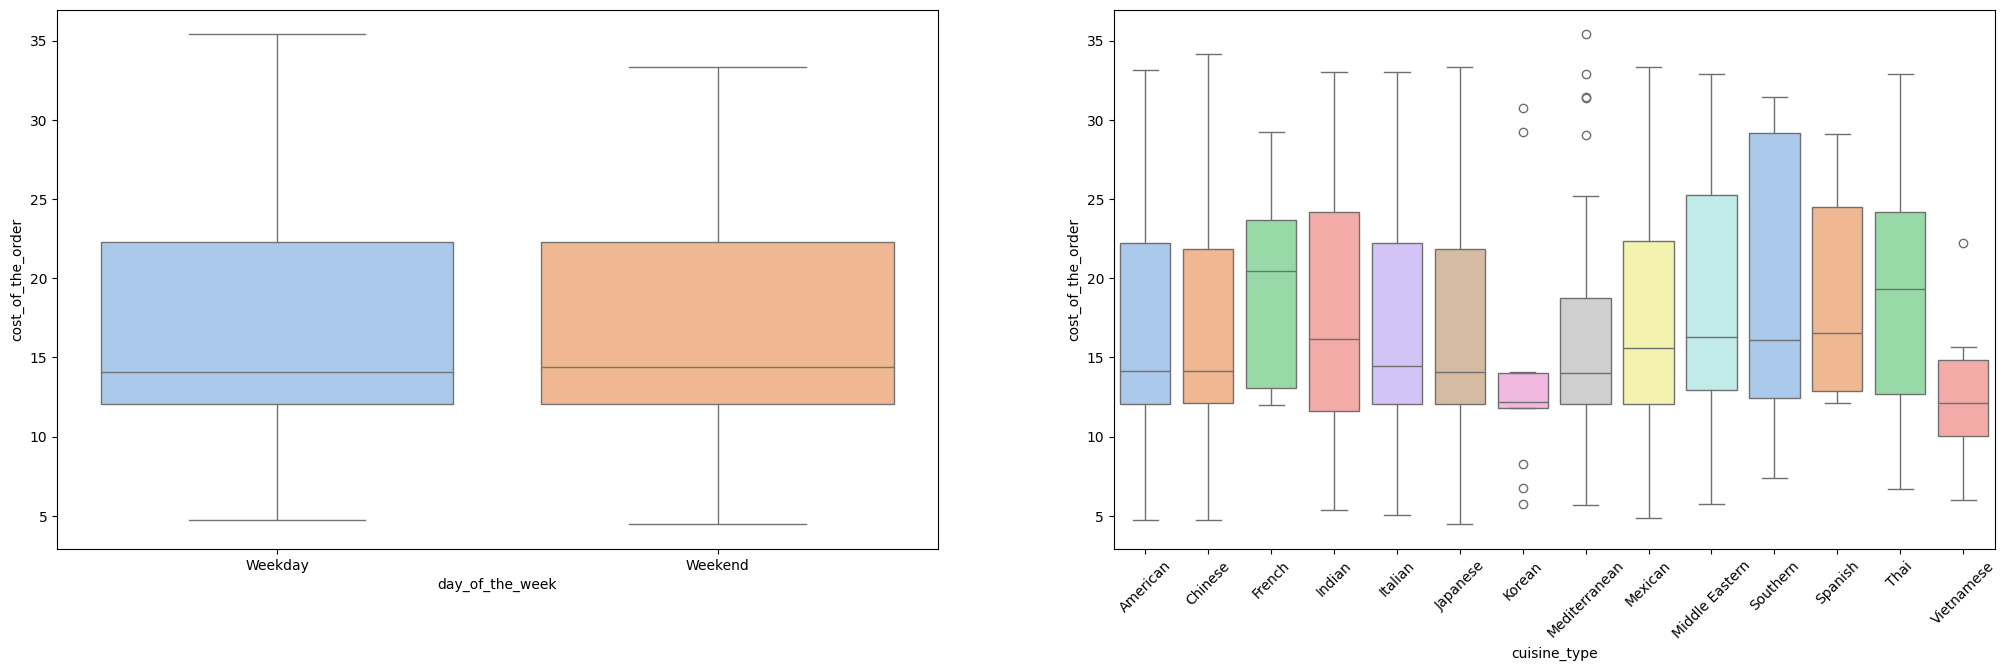

In [ ]:
# Subplots for Cost of the order vs Cuisine type & Day of the Week
fig, axes = plt.subplots(1, 2, figsize=(25, 7), )

# Box plot for Day of the week vs Cost
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', ax=axes[0], palette = 'pastel')

# Box plot for Cuisine Type vs Cost
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', ax=axes[1], palette = 'pastel')
plt.xticks(rotation=45)

plt.show()


#### **Observations:**
Distribution of cost of the order and Day of the Week:

* It looks like there is a slight variation of cost during the weekends but no significant difference.
* There are no outliers

Distribution of Cost of order and Cuisine Type:
* There are significant differences among different cuisine types and costs.
* French cuisine seems to have the higher costs with a slight positive skewness.
* Vietnamese and Korean have the lowest cost, and a considerable positive skew for Korean cuisine.
* American, Japanese, and Italian are mostly on the lower cost range.
* We also observe outliers in the costs for (Korean, Mediterranean, Vietnamese) cuisines.

### **Cost of the Order vs Rating & Restaurant Name**

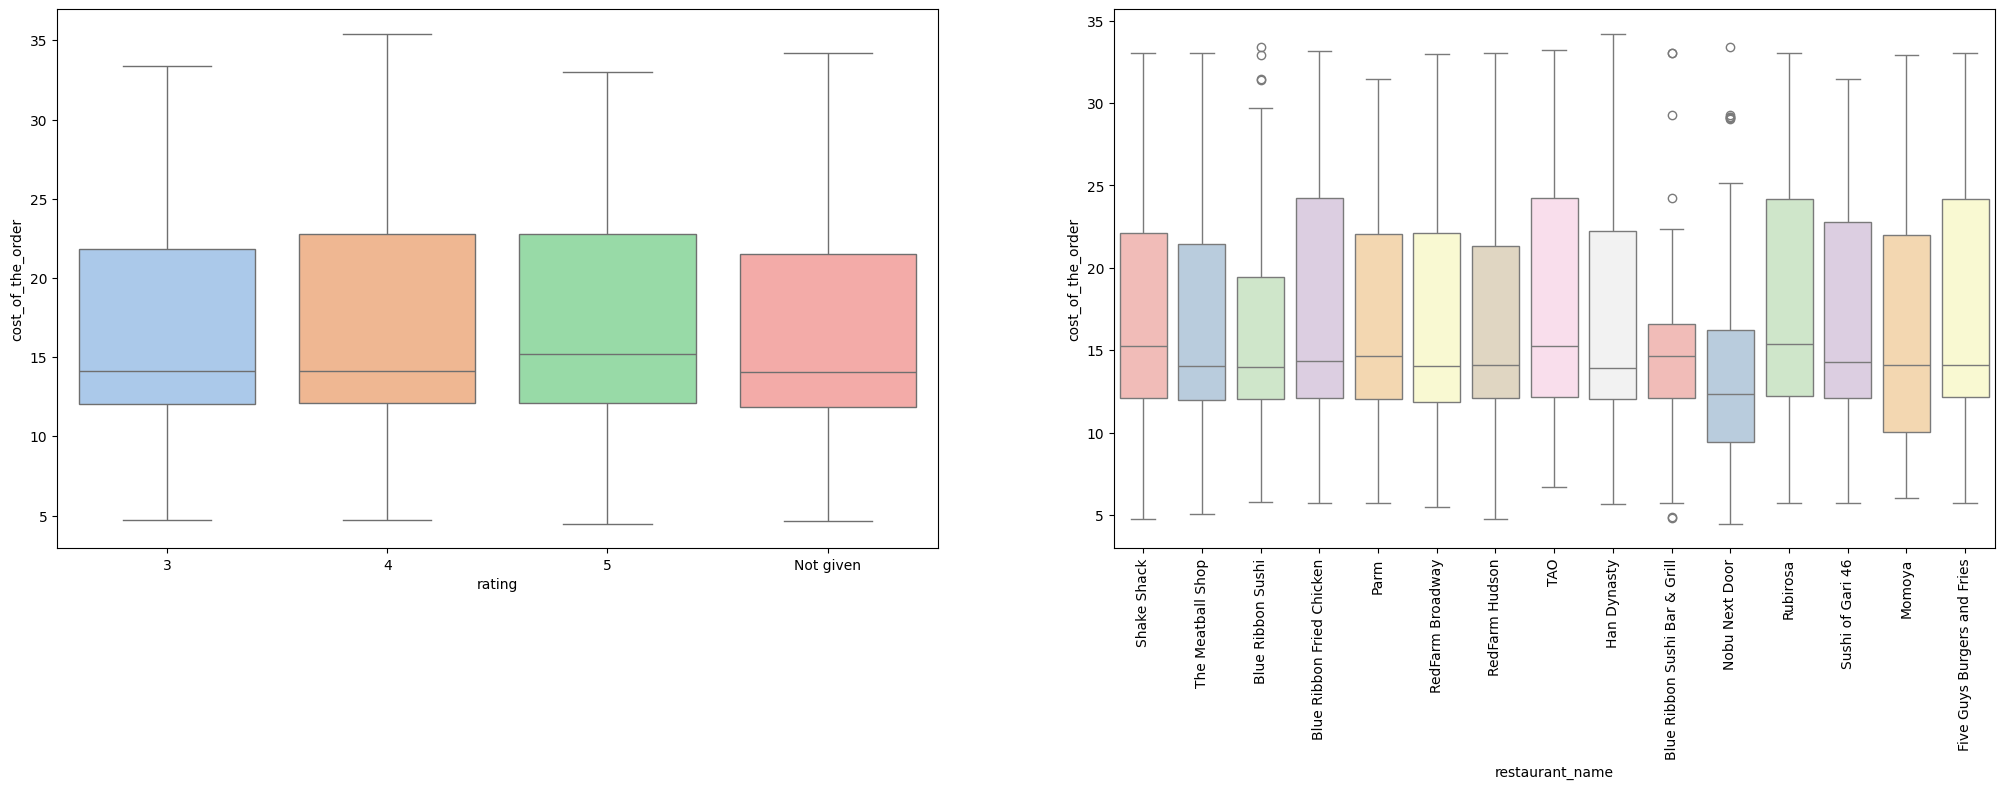

In [ ]:
# Subplots for Cost of the order vs Rating & Restaurant Name
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# Box plot for Rating vs cost
sns.boxplot(data=df, x='rating', y='cost_of_the_order', ax=axes[0], palette = 'pastel')

# Box plot for Restaurant Name vs cost
sns.boxplot(data=df, x='restaurant_name', order=top_15restaurants.index,palette = 'Pastel1', y='cost_of_the_order', ax=axes[1])
plt.xticks(rotation=90)

plt.show()

#### **Observations:**
Distribution of Delivery time vs Rating:

* The median for the ratings tent to be on the lower side.
* There are no outliers

Distribution of Delivery Time vs Top 15 restaurants by number of orders:

* We observe a certain consistency concerning the medians among the Top 15 restaurants.
* Some restaurants have a wider spread in costs, indicating greater variability.
* We observe outliers mostly on the positive side for (Nobu Next Door, Blue Ribbon Sushi, Blue Ribbon Sushi and bar grill )




##**Exploring Food Preparation Time with the categorical variables:**
- Day of the Week
- Cuisine Type
- Rating
- Restaurant Name


### **Food Preparation Time vs Day of the Week &  Cuisine Type**

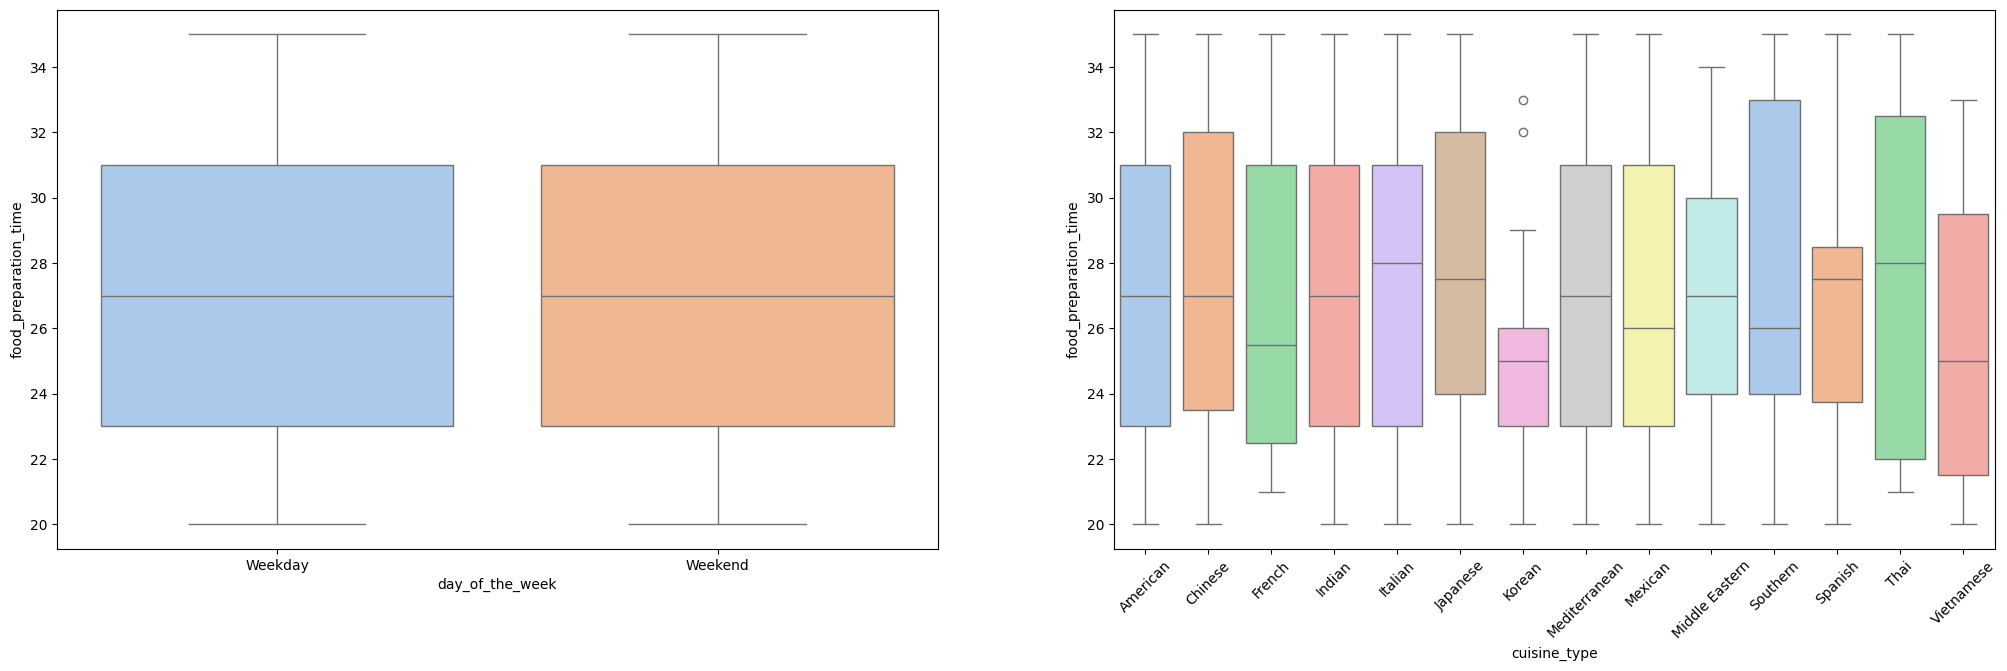

In [ ]:
# Subplots for food preparation time vs Cuisine type & Day of the Week
fig, axes = plt.subplots(1, 2, figsize=(25, 7), )

# Box plot for Day of the week vs food preparation time
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', ax=axes[0], palette = 'pastel')

# Box plot for Cuisine Type vs food preparation time
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', ax=axes[1], palette = 'pastel')
plt.xticks(rotation=45)

plt.show()


#### **Observations:**
Distribution of Food Preparation Time vs Rating:

* The distributions suggests that the time taken to prepare food does not really vary based on whether it is a weekday or weekend.

Distribution of Food Preparation Time vs Cuisine Types:
* Some cuisines show greater variability in preparation times like American and Mexican have more spread in their preparation times.
* Other cuisines, such as Japanese and Korean, have tighter IQRs, suggesting more consistent preparation times.
* There are noticeable outliers in the preparation times for some cuisines.

### **Food Preparation Time vs Rating & Restaurant Name**

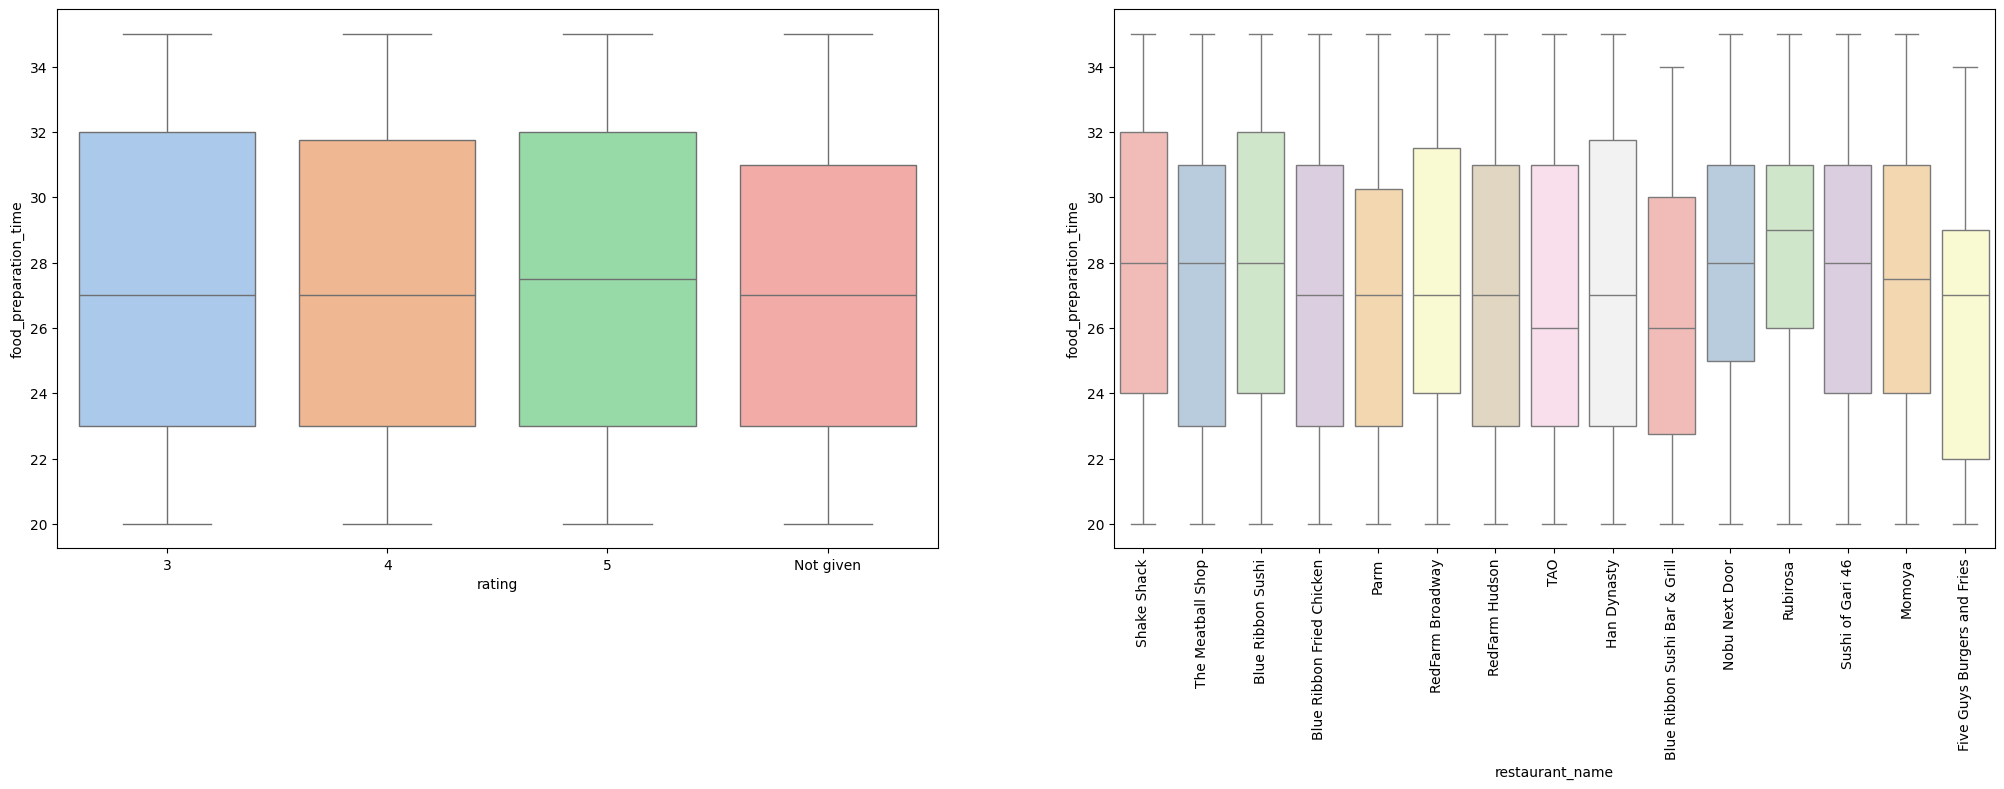

In [ ]:
# Subplots for food preparation time vs Rating & Restaurant Name
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# Box plot for Rating vs food preparation time
sns.boxplot(data=df, x='rating', y='food_preparation_time', ax=axes[0], palette = 'pastel')

# Box plot for Restaurant Name vs food preparation time
sns.boxplot(data=df, x='restaurant_name', order=top_15restaurants.index,palette = 'Pastel1', y='food_preparation_time', ax=axes[1])
plt.xticks(rotation=90)

plt.show()

#### **Observations:**
Food Preparation Time vs Rating
- There is a general slight increase in the cost of the order with higher ratings
Food Preparation Time  vs Top 15 restaurants by number of orders
* The median preparation is similar across the most popular restaurants.
* There are no outliers


##**Exploring Delivery Time with the categorical variables:**
- Day of the Week
- Cuisine Type
- Rating
- Restaurant Name

### **Delivery Time vs Day of the Week &  Cuisine Type**

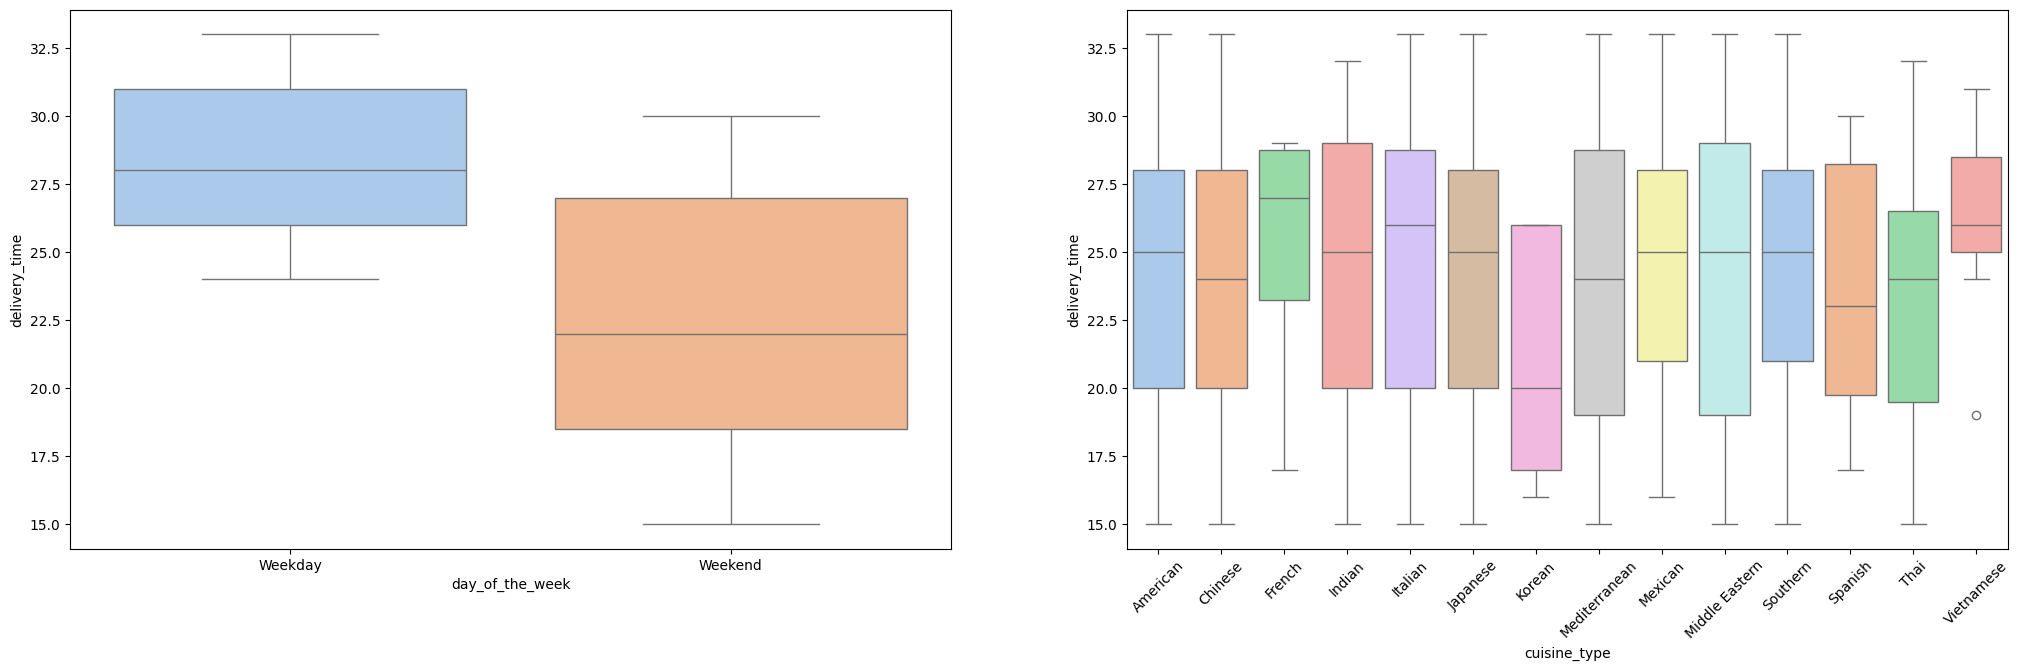

In [ ]:
# Subplots for Delivery Time vs Cuisine type & Day of the Week
fig, axes = plt.subplots(1, 2, figsize=(25, 7), )

# Box plot for Day of the week vs Delivery Time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', ax=axes[0], palette = 'pastel')

# Box plot for Cuisine Type vs Delivery Time
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', ax=axes[1], palette = 'pastel')
plt.xticks(rotation=45)

plt.show()

#### **Observations:**

Distribution of delivery time vs Day of the Week:

* It looks like there is an important variation of delivery time on weekdays compared to the weekends. We observe that the delivery times during the weekdays are considerably longer than the weekends.
* There are no outliers.

Distribution of delivery Time and Cuisine Type:

* There are a few cuisine types that have some significant differences in their delivery time.
* French cuisine seems to have the higher delivery time with a negative skewness.
* Korean cuisine seems to have the lowest delivery time.
* American, Japanese, and Italian have their median close to 25 minutes, with Italian cuisine having slightly higher delivery times.
* We also don't really observe outliers except for one cuisine type (Vietnamese).

### **Delivery Time vs Rating & Restaurant Name**

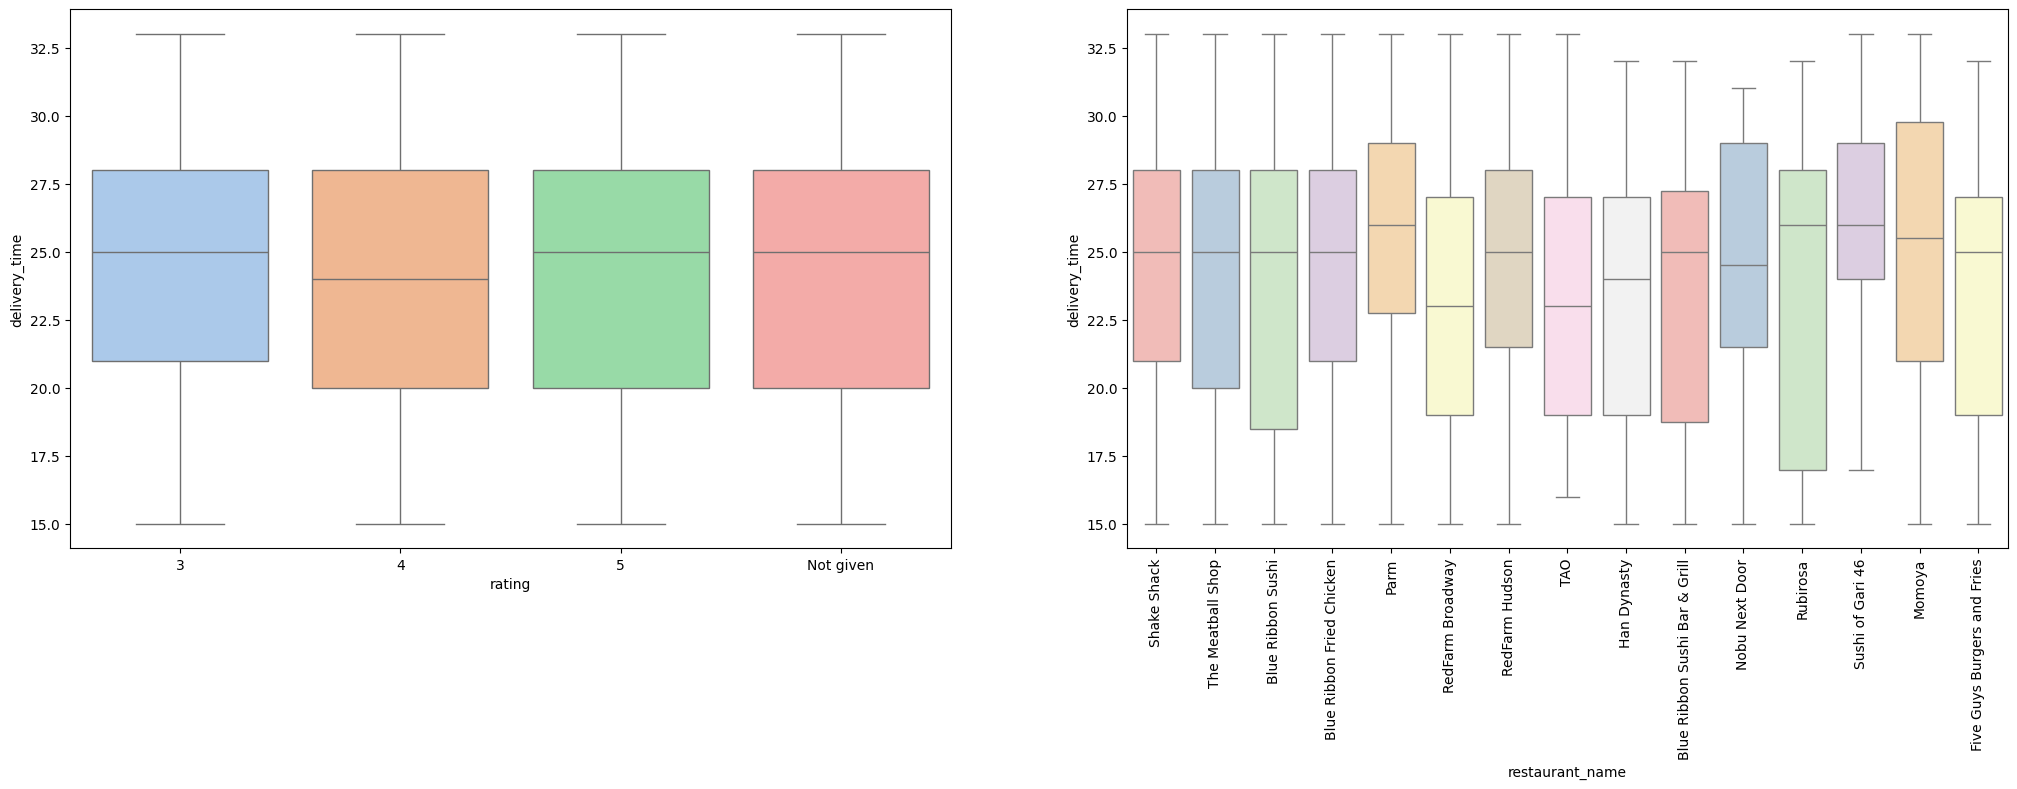

In [ ]:
# Subplots for Delivery Time vs Rating & Restaurant Name
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# Box plot for Rating vs Delivery Time
sns.boxplot(data=df, x='rating', y='delivery_time', ax=axes[0], palette = 'pastel')

# Box plot for Restaurant Name vs Delivery Time
sns.boxplot(data=df, x='restaurant_name', order=top_15restaurants.index,palette = 'Pastel1', y='delivery_time', ax=axes[1])
plt.xticks(rotation=90)

plt.show()

#### **Observations:**

Distribution of Delivery times vs Rating

* Rating seams consistand among the Delivery times with a slight variation for rating 4.We also observe that rating low rating have a slight hier delivery time.

Delivery Time  vs Top 15 restaurants by number of orders:

* The median Delivery time seams similar across the 4 most popular restaurants.
* There are no outliers


###**Let's explore if he company wants to provide a promotional offer in the advertisement of the restaurants.**
Under the condition that to get the offer the restaurants must have a rating count of more than 50 and the average rating greater than 4.

Which restaurants are fulfilling those criterias to get the promotional offer?

In [ ]:
# copy the original data to protect the original
df_copy = df.copy()

# change the rating column from objects to numbers
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')

# remove rows showing NaN
only_rated = df_copy.dropna(subset=['rating'])

# calculate the mean and count of ratings
restaurant_ratings_mean = only_rated.groupby(['restaurant_name'])['rating'].agg(['mean', 'count'])

# keep only restaurants with rating count > 50 and average rating > 4
keep_only_rest = restaurant_ratings_mean[(restaurant_ratings_mean['count'] > 50) & (restaurant_ratings_mean['mean'] > 4)]

keep_only_rest.head()


,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### **Observations:**
                               
#### Restaurant Ratings:
- Blue Ribbon Fried Chicken
  - Mean Rating: 4.328125
  - Count: 64
- Blue Ribbon Sushi
  - Mean Rating: 4.219178
  - Count: 73
- Shake Shack
  - Mean Rating: 4.278195
  - Count: 133
- The Meatball Shop
  - Mean Rating: 4.511905
  - Count: 84

These restaurants have lots of reviews and they are very popular.


### **Let's explore if the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.**
What will be the net revenue generated by the company across all orders?

In [ ]:
#create a function that calculates the percentages
def revenue (cost):
  if cost >20:
    return cost*0.25
  elif 5<cost<20:
    return cost*0.15
  else:
    return 0
# use the function calculations into the cost_of_the_order column
costs_with_revenues = df['cost_of_the_order'].apply(revenue)

Total_revenue = costs_with_revenues.sum()

print('The net revenue generated by the company across all orders:', Total_revenue,'$')


The net revenue generated by the company across all orders: 6166.303 $


#### **Observations:**
The net revenue generated by the company across all orders is around **6.166 $** dollars.


### **Let's explore if the company wants to analyze the total time required to deliver the food.**
What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

Note: The food has to be prepared and then delivered.

In [ ]:
# add the times among the 2 columns
added_time = df['food_preparation_time']+ df['delivery_time']

#isolate the rows that take more >60 min time
orders_more_than_60min = added_time[added_time > 60].count()

# calculate the percetage doing the standard proceddure of division then multiplication by 100
percentage_more_than_60min = '{:.1f}%'.format(100*orders_more_than_60min/ len(df))

print('percentage of orders take more than 60 minutes is:',percentage_more_than_60min)

percentage of orders take more than 60 minutes is: 10.5%


#### **Observations:**

The percentage of orders that are taking more than 60 minutes is 10.5%


### **Let's explore if the company wants to analyze the delivery time of the orders on weekdays and weekends.**
How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df.groupby(['day_of_the_week']) ['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### **Observations:**

Days of the week

* Weekday : Mean = 28.34 minutes
* Weekend : Mean = 22.47 minutes


---
## **Insides and Recommendations from the analysis**
What are the recommendations to help improve the business?

---
####**Insides:**
* American, Japanese, and Italian cuisines have over 71% of the total orders.
* Four of the most popular restaurants (Shake Shack, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, The Meatball Shop) have also the highest ratings with a count of 354.
* It is important to consider that there is a considerable amount of not given ratings which is 38.8%.
* There appears to be a correlation between cuisine types and ratings, with some cuisines receiving consistently higher ratings than others.
* We can also observe a certain correlation between higher cost orders and higher ratings, which may have to do with higher customer satisfaction.
* There is a difference in order volumes between weekdays and weekends.




#### **Recommendations:**

* Enhancing the menu for American, Japanese, and Italian cuisines to attract and keep customers.
* Create specific marketing campaigns and promotions for American, Japanese, and Italian cuisines.
* Focus promotional campaigns on popular restaurants like Shake Shack, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, and The Meatball Shop.
* Introduce loyalty programs for regular customers.
* Maintain high quality and service at these popular restaurants to keep good ratings and customer satisfaction.
* Make the rating process easier and quicker to encourage more customers to leave reviews.
* Study why these restaurants have high ratings and apply those strategies to other cuisines to improve overall customer satisfaction.
* Slightly increase prices for higher-rated cuisines to reflect their quality.
* Adjust staff and resources to handle more orders on weekends.
* Currently, food preparation times differ between restaurants. Identifying patterns for different cuisines can help find efficiency issues.
* Delivery times also vary and are important for customer satisfaction. Long delivery times could negatively affect ratings.

---
####**Let's Work Together**
Christos Parapanisios - christosparapanisios@gmail.com

---